In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro, levene, f_oneway, kruskal, mannwhitneyu

sns.set(style="whitegrid")
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
import os
import sys
sys.path.insert(0, os.path.abspath("../src"))
from config import RAW_DATA_PATH

In [4]:
df = pd.read_csv(RAW_DATA_PATH)

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
from utils.helpers import data_overview
data_overview(df)

Veri Seti Genel Bilgisi

Gözlem sayısı: 7043
Özellik sayısı: 21
Sütunlar: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Veri Tipleri ve Bellek Kullanımı:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null

In [7]:
import os
os.chdir("..")

In [8]:
from data.preprocessing import fix_total_charges
from utils.helpers import grab_col_names
os.chdir("..")

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Toplam değişken sayısı: 21
Kategorik değişken sayısı: 17
Sayısal değişken sayısı: 3
Kategorik görünümlü ama kardinal değişken sayısı: 1


In [9]:
df = fix_total_charges(df)

In [10]:
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'SeniorCitizen']

In [11]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [12]:
cat_but_car

['customerID']

In [13]:
from data.preprocessing import map_binary_columns, get_binary_columns, get_multi_class_categoricals

binary_cols = get_binary_columns(df, drop_cols=["customerID"])
multi_cat_cols = get_multi_class_categoricals(df, drop_cols=["customerID"])

In [14]:
binary_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [15]:
multi_cat_cols

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [16]:
map_binary_columns(df, binary_cols)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0
7039,2234-XADUH,0,0,1,1,72,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,0,0,1,1,11,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1


🔹 Sınıf Dağılımı:
 Churn
0    5174
1    1869
Name: count, dtype: int64

🔹 Oranlar:
 Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


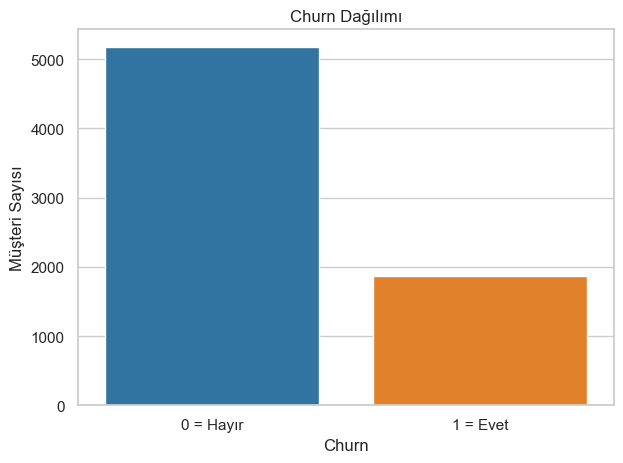

In [17]:
from utils.eda import plot_churn_distribution, plot_churn_for_binary_codes
plot_churn_distribution(df)

In [18]:
binary_cols = [col for col in binary_cols if col != "Churn"]

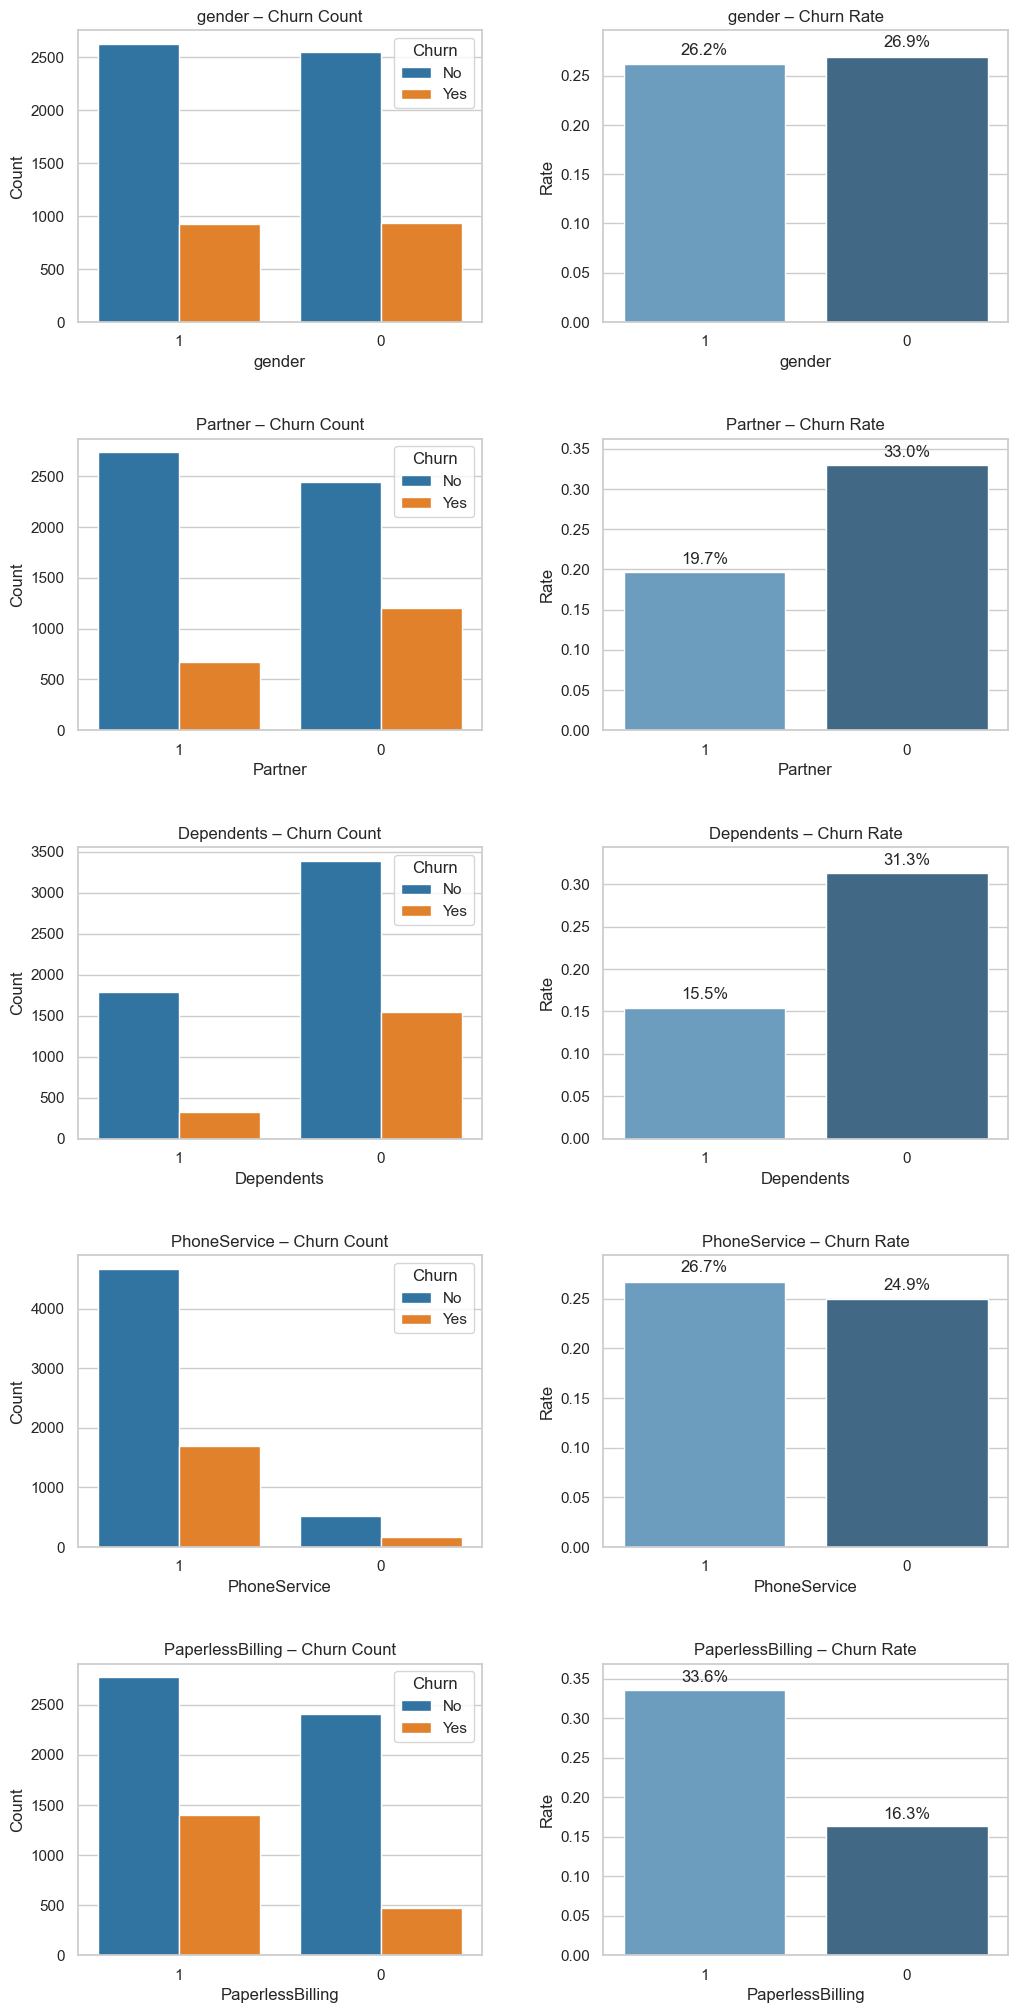

In [19]:
plot_churn_for_binary_codes(df, binary_cols)

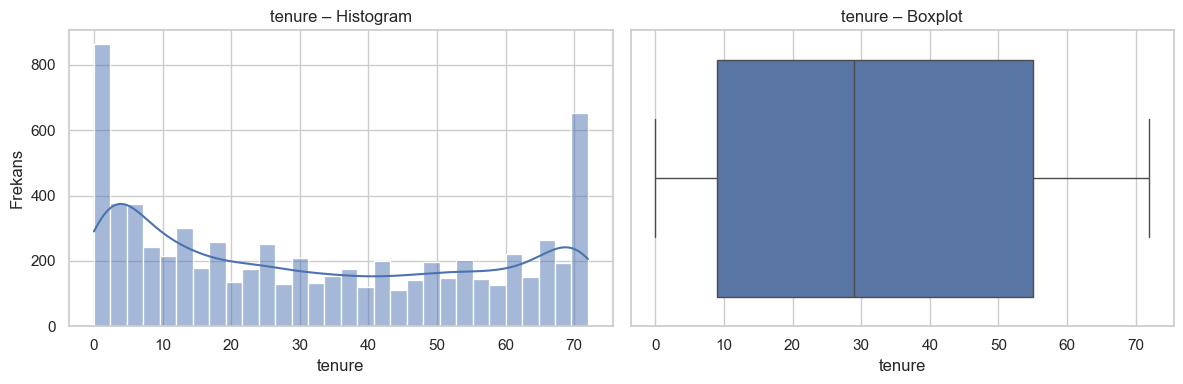

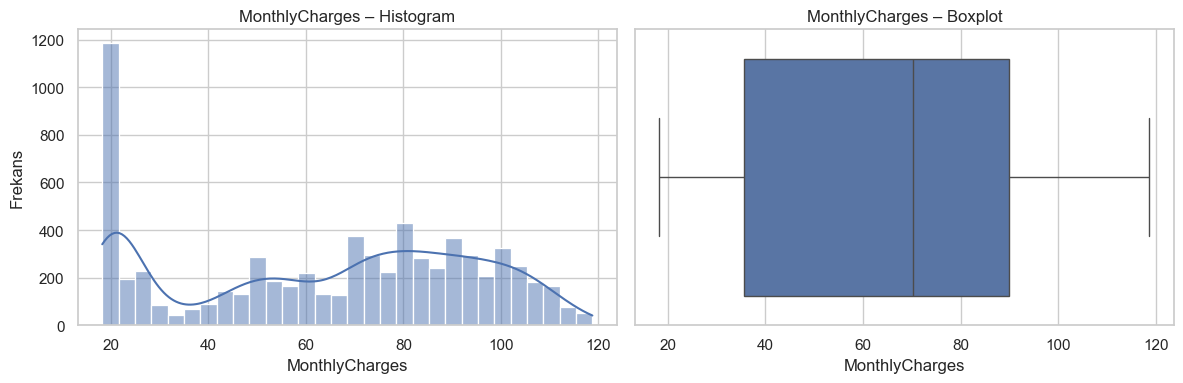

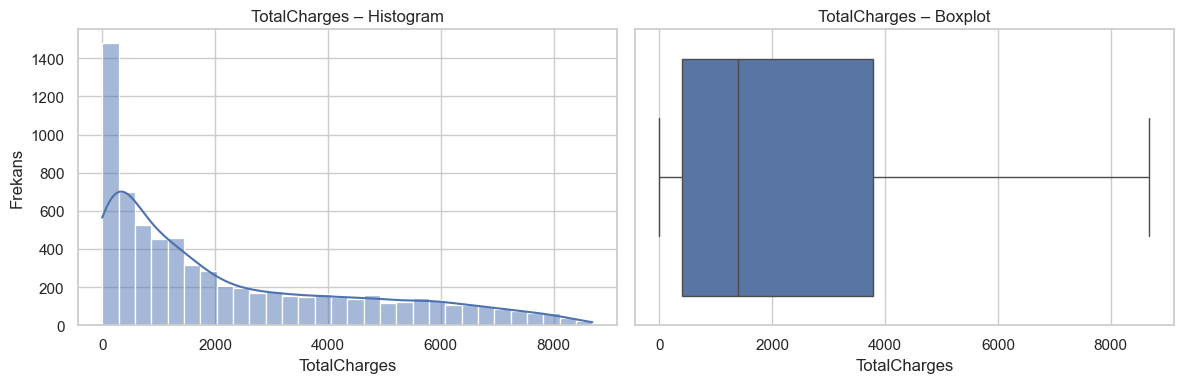

In [20]:
from utils.eda import plot_numeric_distributions

plot_numeric_distributions(df, num_cols=num_cols)

In [21]:
churn_corr = df[num_cols + ["Churn"]].corr().loc[num_cols, ["Churn"]]

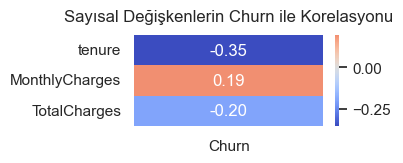

In [22]:
plt.figure(figsize=(4, len(num_cols) * 0.6))
sns.heatmap(churn_corr, annot=True, cmap="coolwarm", center=0, fmt=".2f", cbar=True)
plt.title("Sayısal Değişkenlerin Churn ile Korelasyonu", pad=10)
plt.tight_layout()
plt.show()

In [23]:
from utils.stats import ab_numeric_tests
from utils.eda   import plot_significant_numeric_scatter

stats_df = ab_numeric_tests(df, num_cols, binary_cols)

In [24]:
stats_df

,numeric,group,test,stat,pvalue,assumption,significant
0,tenure,gender,Mann-Whitney U,6174973.0,7.698661e-01,Non-parametrik,False
1,tenure,Partner,Mann-Whitney U,8946361.0,6.541651e-229,Non-parametrik,True
2,tenure,Dependents,Mann-Whitney U,4127966.0,3.505314e-43,Non-parametrik,True
3,tenure,PhoneService,Mann-Whitney U,2133195.5,4.765474e-01,Non-parametrik,False
4,tenure,PaperlessBilling,Mann-Whitney U,6043679.0,5.184416e-01,Non-parametrik,False
5,MonthlyCharges,gender,Mann-Whitney U,6298264.5,2.490274e-01,Non-parametrik,False
6,MonthlyCharges,Partner,Mann-Whitney U,6969452.0,8.883257e-20,Non-parametrik,True
7,MonthlyCharges,Dependents,Mann-Whitney U,5906237.5,2.708791e-19,Non-parametrik,True
8,MonthlyCharges,PhoneService,Mann-Whitney U,1154042.0,5.463028e-90,Non-parametrik,True
9,MonthlyCharges,PaperlessBilling,Mann-Whitney U,8424265.5,2.403467e-185,Non-parametrik,True


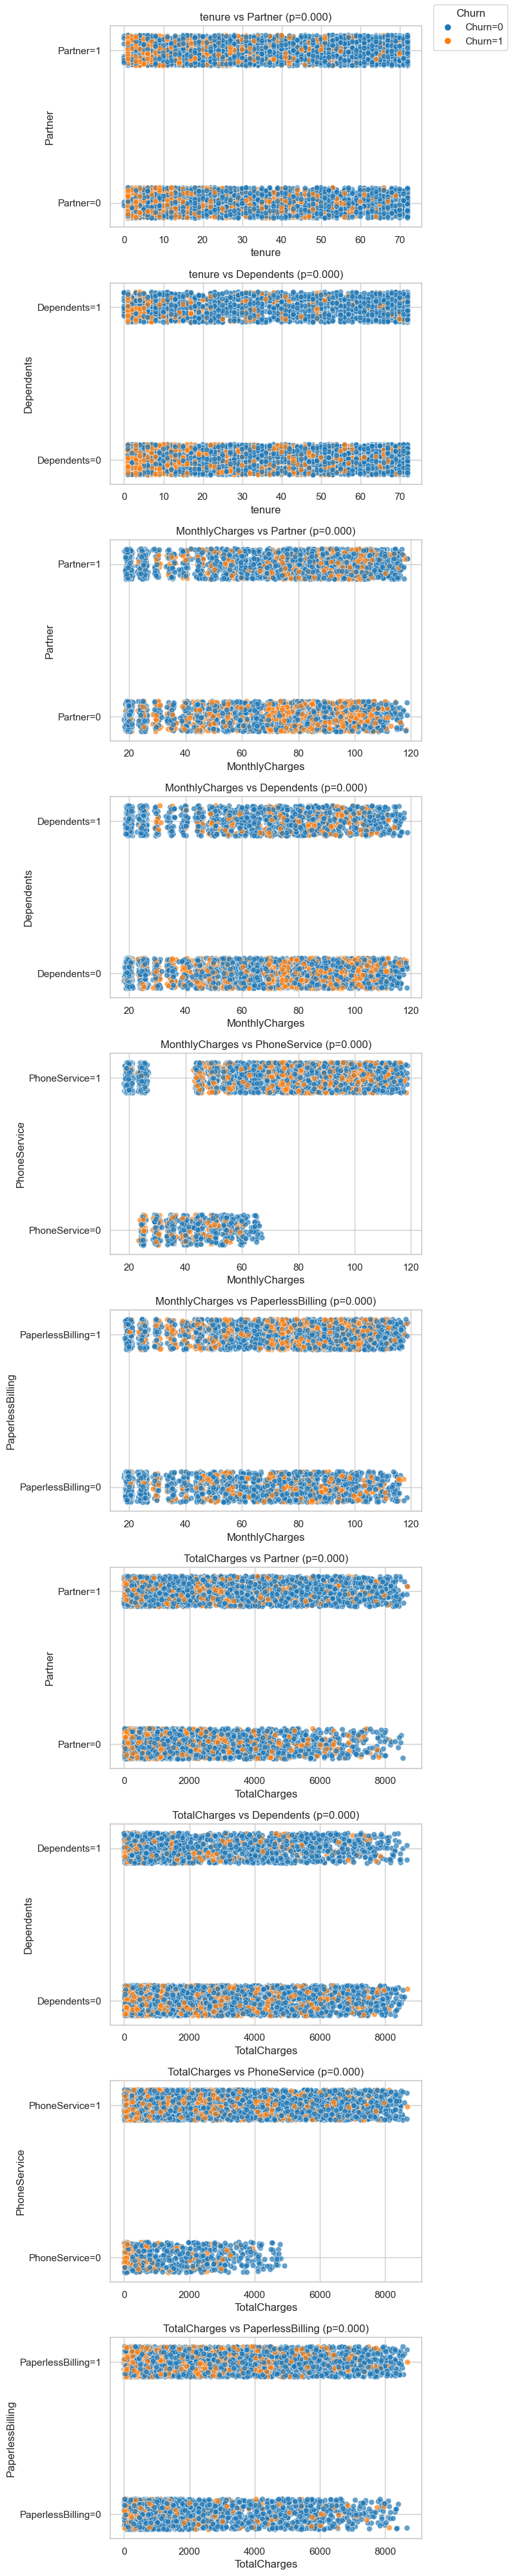

In [25]:
plot_significant_numeric_scatter(df, stats_df)

In [26]:
from utils.stats import ab_binary_tests
from utils.eda   import plot_significant_binary_churn

In [27]:
binary_stats_df = ab_binary_tests(df, target_col="Churn", group_cols=binary_cols)

In [28]:
binary_stats_df

,feature,test,stat,pvalue,assumption,significant
4,PaperlessBilling,Proportion Z-Test,-16.098477,2.614597e-58,exp.freq.≥5 → Z-Test,True
2,Dependents,Proportion Z-Test,13.781884,3.276083e-43,exp.freq.≥5 → Z-Test,True
1,Partner,Proportion Z-Test,12.625947,1.519037e-36,exp.freq.≥5 → Z-Test,True
3,PhoneService,Proportion Z-Test,-1.002202,3.162461e-01,exp.freq.≥5 → Z-Test,False
0,gender,Proportion Z-Test,0.722749,4.698339e-01,exp.freq.≥5 → Z-Test,False


1. PaperlessBilling :
- “No” grubunun churn oranı (“No Paperless”) “Yes” grubundan anlamlı biçimde daha düşük. Kağıtsız fatura kullananlar daha fazla churn ediyor.
2. Dependents :
- “No Dependents” müşterilerin churn oranı, sorumlulukları olanlardan (“Yes Dependents”) anlamlı olarak daha yüksek.
3. Partner :
- Partneri olmayan (“No Partner”) müşterilerin churn oranı, partneri olanlardan anlamlı olarak daha yüksek.
4. PhoneService :
- Telefona sahip olma/olmama churn üzerinde anlamlı bir fark yaratmıyor.
5. gender :
- Cinsiyetin churn oranına etkisi istatistiksel olarak anlamlı değil.

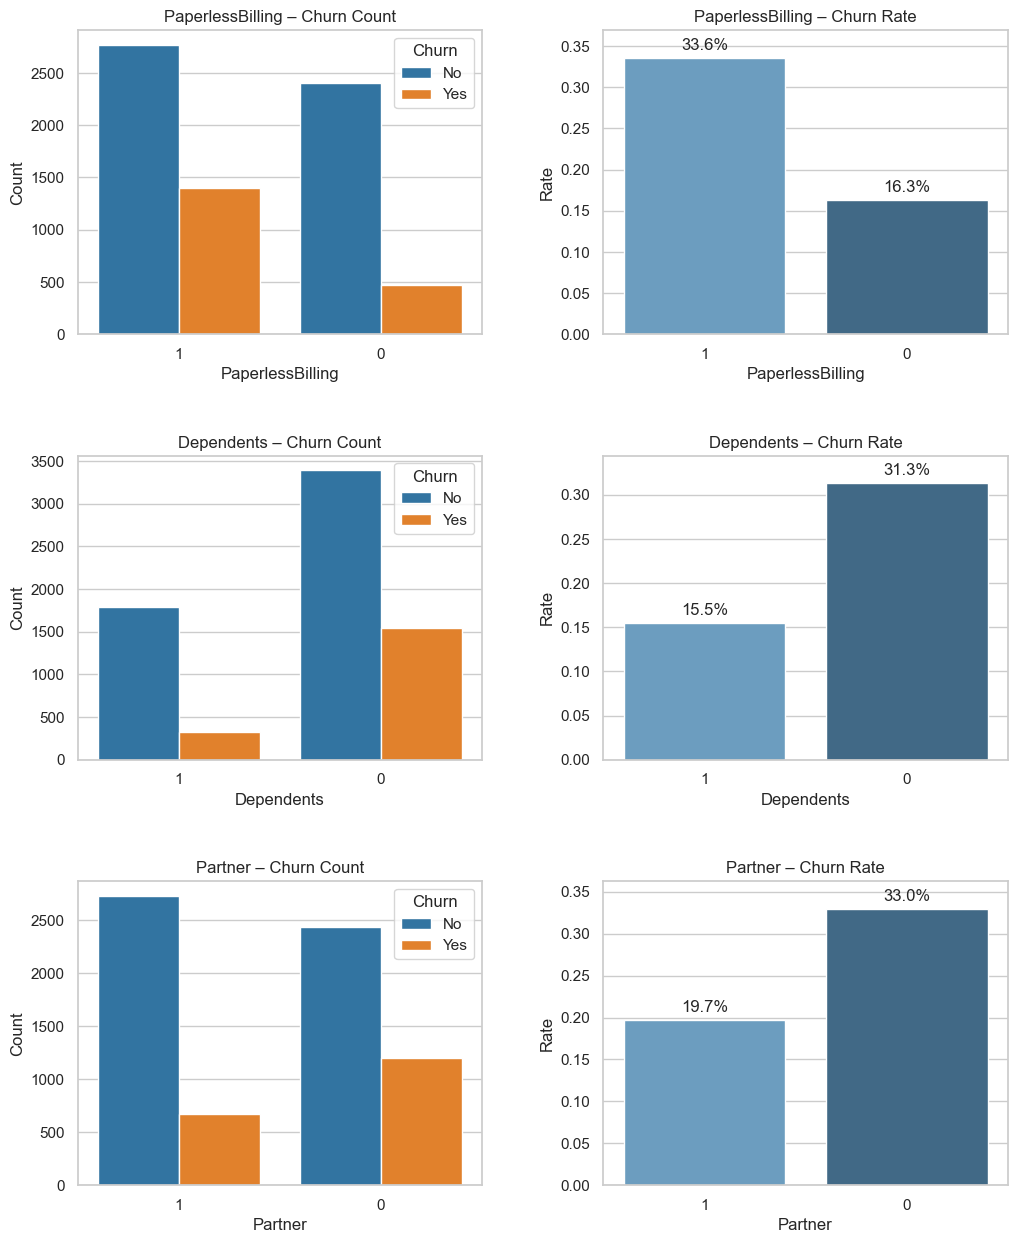

In [29]:
plot_significant_binary_churn(df, binary_stats_df, churn_col="Churn")

In [30]:
from scipy.stats import shapiro, levene, f_oneway, kruskal

In [31]:
from utils.stats import ab_multigroup_tests
from utils.eda   import plot_significant_multigroup

In [32]:
multi_stats_df = ab_multigroup_tests(df, num_cols, multi_cat_cols)
multi_stats_df

,numeric,group,test,stat,pvalue,assumption,significant
14,MonthlyCharges,DeviceProtection,Kruskal‐Wallis H Test,3922.424186,0.000000e+00,Non‐parametrik,True
15,MonthlyCharges,TechSupport,Kruskal‐Wallis H Test,3615.800544,0.000000e+00,Non‐parametrik,True
28,TotalCharges,Contract,Kruskal‐Wallis H Test,1534.451862,0.000000e+00,Non‐parametrik,True
13,MonthlyCharges,OnlineBackup,Kruskal‐Wallis H Test,3783.521270,0.000000e+00,Non‐parametrik,True
12,MonthlyCharges,OnlineSecurity,Kruskal‐Wallis H Test,3572.499599,0.000000e+00,Non‐parametrik,True
11,MonthlyCharges,InternetService,Kruskal‐Wallis H Test,5529.733603,0.000000e+00,Non‐parametrik,True
10,MonthlyCharges,MultipleLines,Kruskal‐Wallis H Test,1983.536597,0.000000e+00,Non‐parametrik,True
20,TotalCharges,MultipleLines,Kruskal‐Wallis H Test,1564.968915,0.000000e+00,Non‐parametrik,True
8,tenure,Contract,Kruskal‐Wallis H Test,3139.236066,0.000000e+00,Non‐parametrik,True
22,TotalCharges,OnlineSecurity,Kruskal‐Wallis H Test,1666.197487,0.000000e+00,Non‐parametrik,True


In [33]:
for _, row in multi_stats_df.sort_values("pvalue").head(5).iterrows():
    print(f"{row['group']} → {df[row['group']].nunique()} sınıf")

DeviceProtection → 3 sınıf
StreamingMovies → 3 sınıf
StreamingTV → 3 sınıf
StreamingTV → 3 sınıf
TechSupport → 3 sınıf


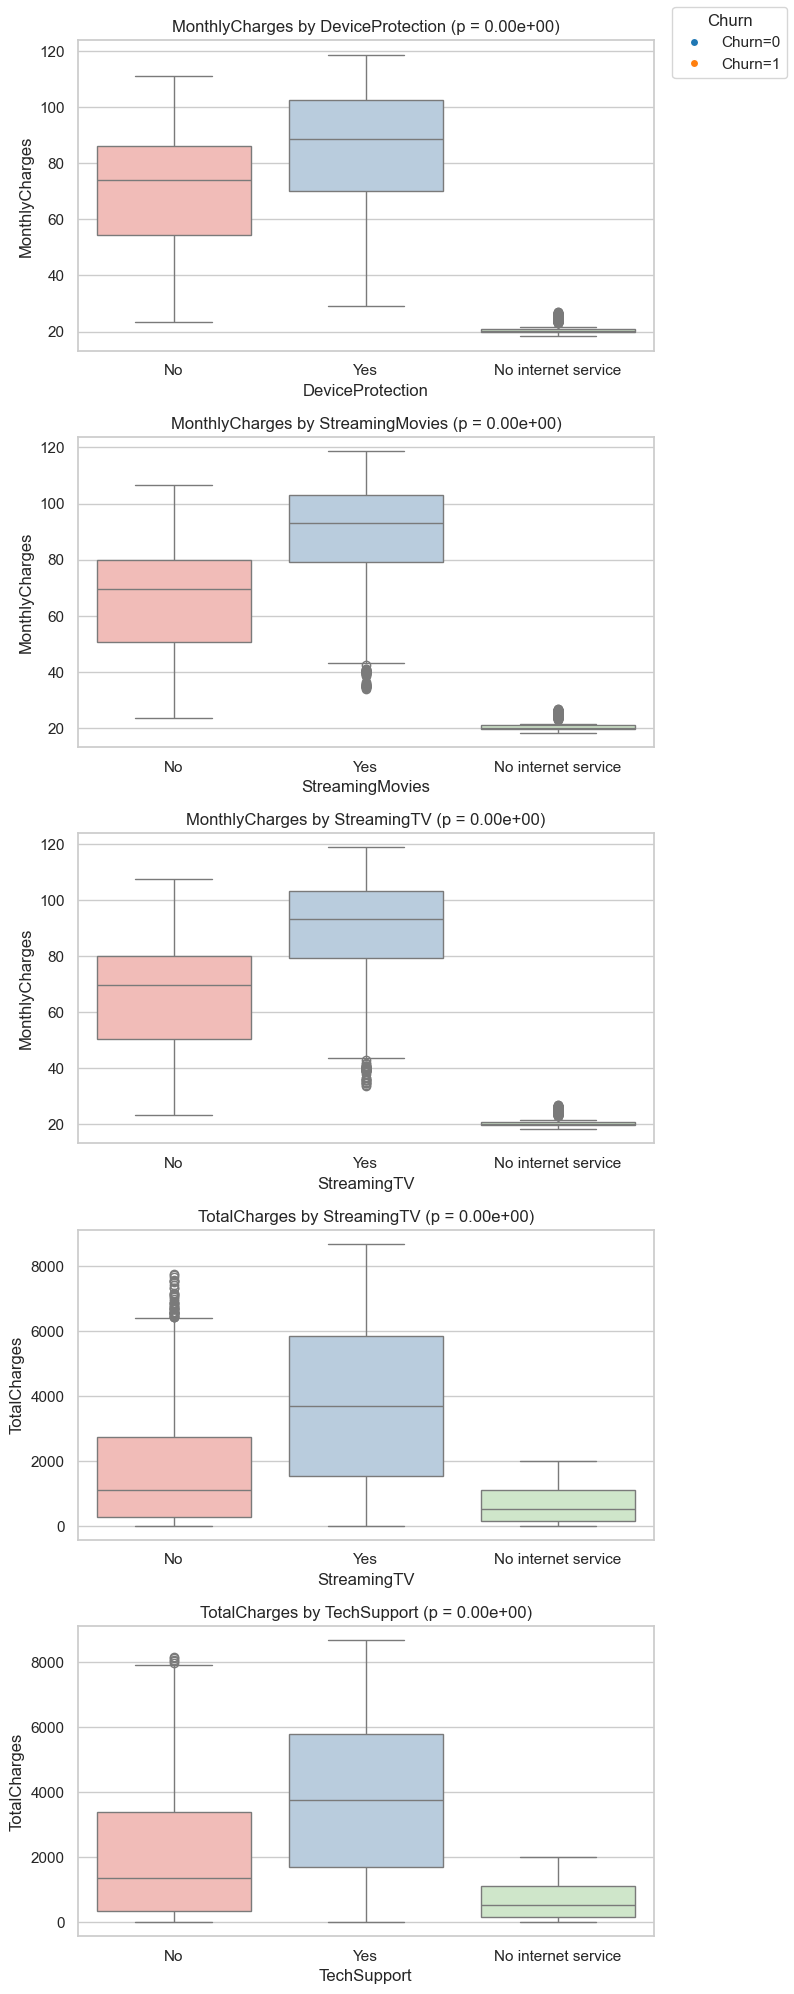

In [34]:
plot_significant_multigroup(df, multi_stats_df, top_n=5, show_strip=False, max_classes=6)

# Feature engineering

In [35]:
missing_df = df.isnull().sum().to_frame(name="missing_count")
missing_df

,missing_count
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [36]:
from data.preprocessing import feature_engineering

df, cat_cols, num_cols, binary_cols = feature_engineering(df, cat_cols, num_cols, binary_cols)

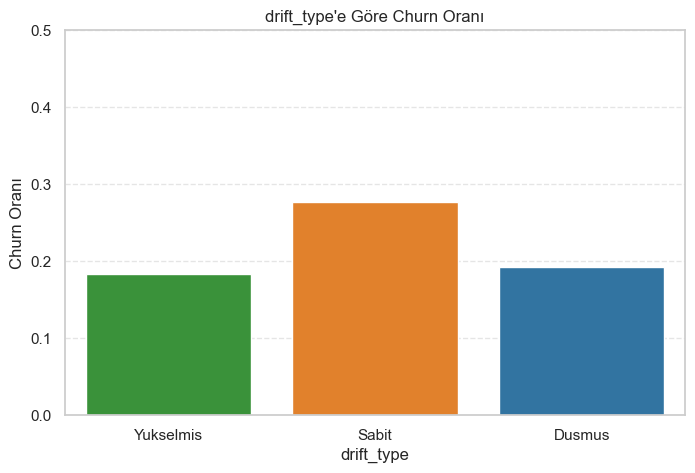

In [37]:
plt.figure(figsize=(8,5))
sns.barplot(
    x="drift_type", 
    y="Churn", 
    data=df, 
    estimator=lambda x: sum(x)/len(x), 
    ci=None,
    palette=["#2ca02c", "#ff7f0e", "#1f77b4"]
)
plt.title("drift_type'e Göre Churn Oranı")
plt.ylabel("Churn Oranı")
plt.xlabel("drift_type")
plt.ylim(0, 0.5)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


In [38]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,drift_type,avg_monthly_charge,is_auto_payment,num_services
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0,Sabit,14.925000,0,1
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0,Sabit,53.985714,0,2
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1,Sabit,36.050000,0,2
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0,Sabit,40.016304,1,3
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1,Sabit,50.550000,0,0


In [39]:
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'SeniorCitizen',
 'drift_type']

In [40]:
from data.preprocessing import encode_features

df_encoded = encode_features(df, cat_cols, num_cols)

In [41]:
df_encoded.head()

,customerID,tenure,MonthlyCharges,TotalCharges,avg_monthly_charge,is_auto_payment,num_services,gender_1,Partner_1,Dependents_1,PhoneService_1,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_1,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_1,drift_type_Sabit,drift_type_Dusmus,Churn
0,7590-VHVEG,1,29.85,29.85,14.925000,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
1,5575-GNVDE,34,56.95,1889.50,53.985714,0,2,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
2,3668-QPYBK,2,53.85,108.15,36.050000,0,2,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1
3,7795-CFOCW,45,42.30,1840.75,40.016304,1,3,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,9237-HQITU,2,70.70,151.65,50.550000,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1


In [42]:
df = pd.read_csv(RAW_DATA_PATH)

In [43]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [44]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

In [45]:
df[df['tenure'] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [46]:
from data.preprocessing import preprocess_telco_data
df_encoded, X_cols, y_col = preprocess_telco_data(df)

Toplam değişken sayısı: 20
Kategorik değişken sayısı: 17
Sayısal değişken sayısı: 3
Kategorik görünümlü ama kardinal değişken sayısı: 0


In [47]:
missing_rows = df.isnull().any(axis=1)

In [48]:
df_encoded[missing_rows]

,tenure,MonthlyCharges,TotalCharges,avg_monthly_charge,is_auto_payment,num_services,gender_1,Partner_1,Dependents_1,PhoneService_1,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_1,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_1,drift_type_Sabit,drift_type_Dusmus,Churn


In [49]:
df_encoded.head()

,tenure,MonthlyCharges,TotalCharges,avg_monthly_charge,is_auto_payment,num_services,gender_1,Partner_1,Dependents_1,PhoneService_1,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_1,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_1,drift_type_Sabit,drift_type_Dusmus,Churn
0,1,29.85,29.85,14.925000,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
1,34,56.95,1889.50,53.985714,0,2,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
2,2,53.85,108.15,36.050000,0,2,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1
3,45,42.30,1840.75,40.016304,1,3,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,2,70.70,151.65,50.550000,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1


In [50]:
df_encoded.isnull().sum()[df_encoded.isnull().sum() > 0]

Series([], dtype: int64)

In [51]:
missing_rows = df_encoded.isnull().any(axis=1)

In [52]:
df_encoded[missing_rows]

,tenure,MonthlyCharges,TotalCharges,avg_monthly_charge,is_auto_payment,num_services,gender_1,Partner_1,Dependents_1,PhoneService_1,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_1,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_1,drift_type_Sabit,drift_type_Dusmus,Churn


In [53]:
from data.split import train_test_split_data

X_train, X_test, y_train, y_test = train_test_split_data(df_encoded)

In [54]:
from data.scaling import scale_numeric_features

X_train, X_test = scale_numeric_features(X_train, X_test, num_cols)

In [55]:
X_train.isnull().sum()[X_train.isnull().sum() > 0]

Series([], dtype: int64)

In [56]:
from models.evaluate_model import evaluate_models_with_optimization

cv_results, best_models = evaluate_models_with_optimization(X_train, y_train)


🔹 Logistic Regression (Default)
🔧 Logistic Regression (Tuned)

🔹 Random Forest (Default)
🔧 Random Forest (Tuned)

🔹 SVM (Default)
🔧 SVM (Tuned)

🔹 KNN (Default)


  File "C:\Users\omeru\anaconda3\envs\Telco-Customer-Churn\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\omeru\anaconda3\envs\Telco-Customer-Churn\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\omeru\anaconda3\envs\Telco-Customer-Churn\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\omeru\anaconda3\envs\Telco-Customer-Churn\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


🔧 KNN (Tuned)

🔹 XGBoost (Default)
🔧 XGBoost (Tuned)

🔹 CatBoost (Default)
🔧 CatBoost (Tuned)

🔹 LightGBM (Default)
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1196, number of negative: 3311
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000563 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 905
[LightGBM] [Info] Number of data points in the train set: 4507, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265365 -> initscore=-1.018268
[LightGBM] [Info] Start training from score -1.018268
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1196, number of negative: 3311
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000550 second

In [57]:
cv_results

,Model,Accuracy,Precision,Recall,F1,ROC AUC
0,Logistic Regression (Default),0.805643,0.668659,0.532441,0.592506,0.718382
1,Logistic Regression (Tuned),0.806175,0.671960,0.529097,0.591631,0.717675
2,CatBoost (Tuned),0.804577,0.671531,0.517057,0.584132,0.712743
3,CatBoost (Default),0.800849,0.658773,0.517726,0.579384,0.710419
4,SVM (Tuned),0.802626,0.669851,0.506355,0.576552,0.707996
5,XGBoost (Tuned),0.794638,0.642654,0.511037,0.568759,0.704057
6,Random Forest (Tuned),0.799606,0.664218,0.497659,0.568661,0.703164
7,LightGBM (Default),0.790910,0.630265,0.512375,0.564827,0.701946
8,SVM (Default),0.802093,0.678502,0.484281,0.564801,0.700583
9,LightGBM (Tuned),0.799429,0.676382,0.469565,0.553929,0.694071


In [58]:
best_models

{'Logistic Regression (Tuned)': LogisticRegression(C=10, max_iter=1000, random_state=42),
 'Random Forest (Tuned)': RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42),
 'SVM (Tuned)': SVC(C=0.1, kernel='linear', probability=True, random_state=42),
 'KNN (Tuned)': KNeighborsClassifier(n_neighbors=7),
 'XGBoost (Tuned)': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, feature_weights=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=3, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_


🔍 Model: Logistic Regression (Tuned)

📋 Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1035
           1       0.67      0.55      0.60       374

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



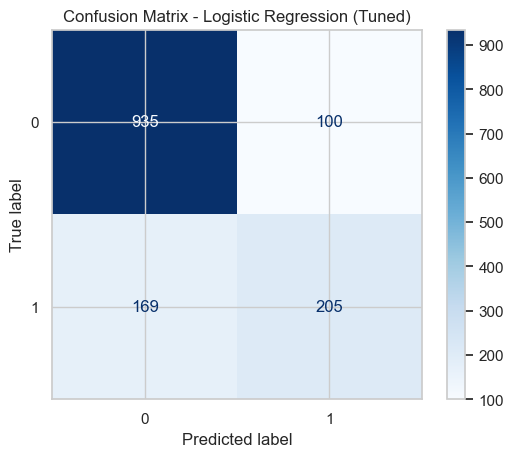

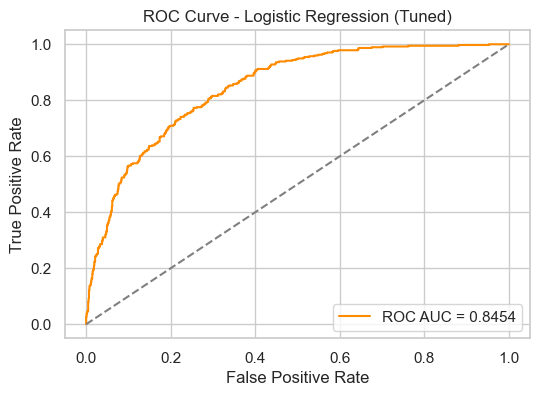

💾 Model kaydedildi: models/logistic_regression_tuned.pkl

🔍 Model: Random Forest (Tuned)

📋 Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.51      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



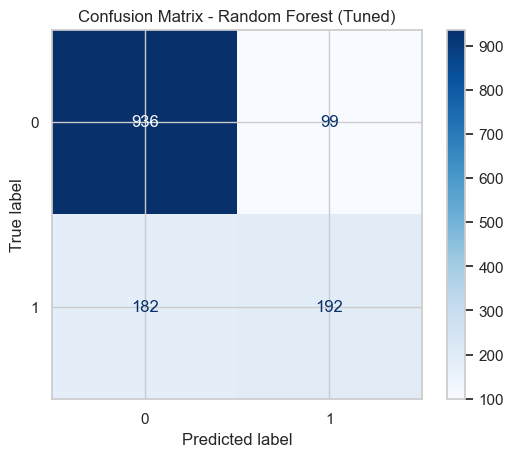

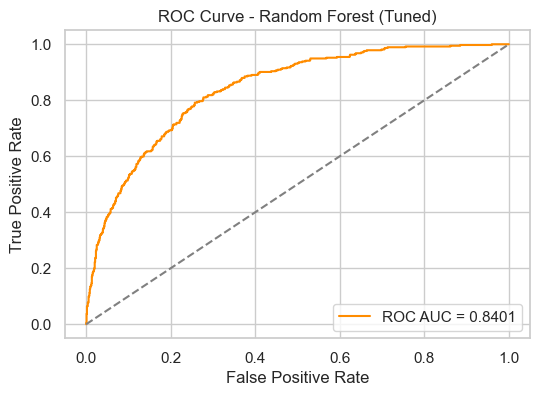

💾 Model kaydedildi: models/random_forest_tuned.pkl

🔍 Model: SVM (Tuned)

📋 Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1035
           1       0.66      0.50      0.57       374

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



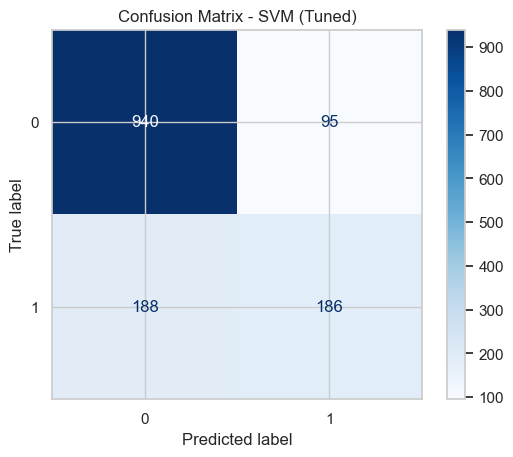

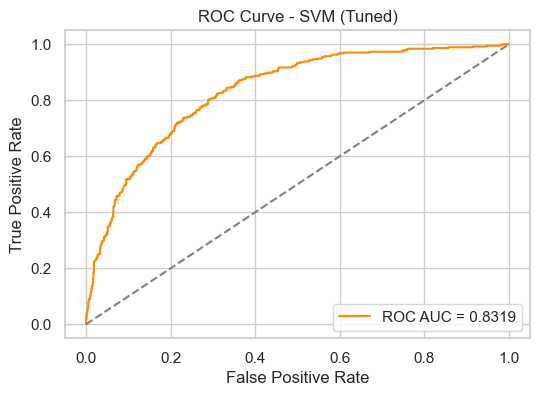

💾 Model kaydedildi: models/svm_tuned.pkl

🔍 Model: KNN (Tuned)

📋 Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1035
           1       0.56      0.54      0.55       374

    accuracy                           0.77      1409
   macro avg       0.70      0.69      0.70      1409
weighted avg       0.76      0.77      0.76      1409



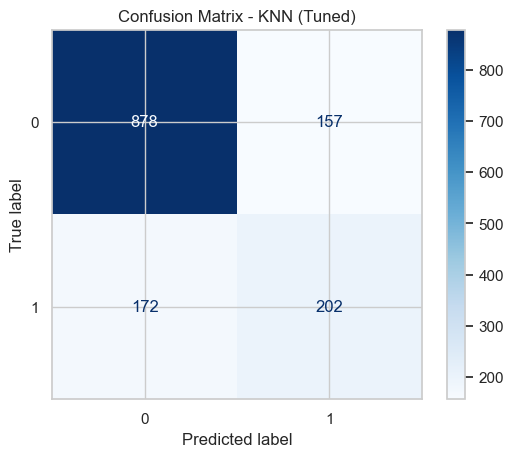

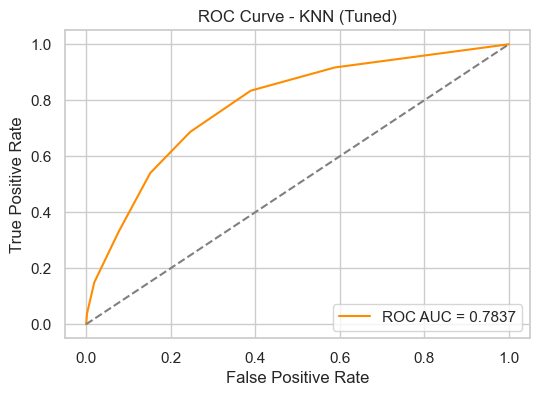

💾 Model kaydedildi: models/knn_tuned.pkl

🔍 Model: XGBoost (Tuned)

📋 Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.64      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



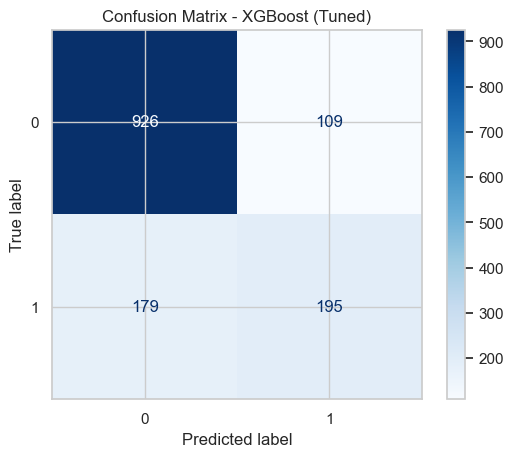

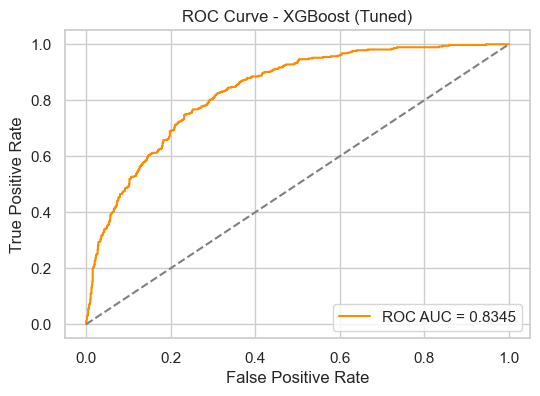

💾 Model kaydedildi: models/xgboost_tuned.pkl

🔍 Model: CatBoost (Tuned)

📋 Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.51      0.57       374

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



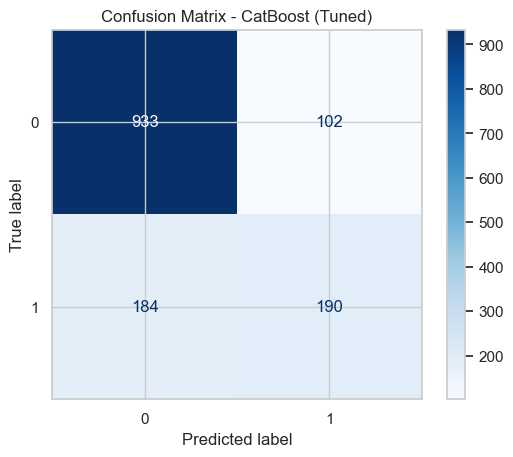

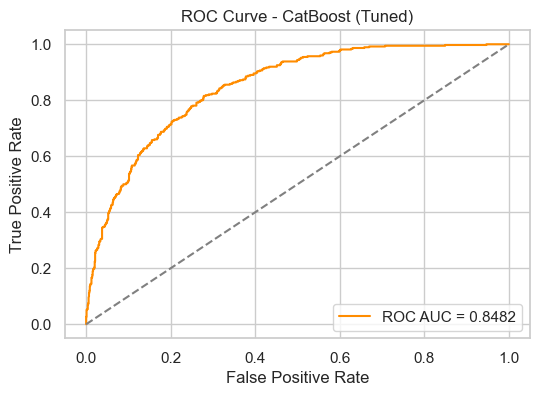

💾 Model kaydedildi: models/catboost_tuned.pkl

🔍 Model: LightGBM (Tuned)
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000373 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 905
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265353 -> initscore=-1.018328
[LightGBM] [Info] Start training from score -1.018328

📋 Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1035
           1       0.67      0.48      0.56       374

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72     

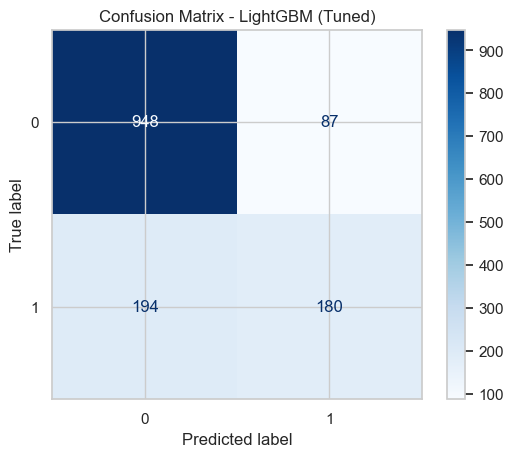

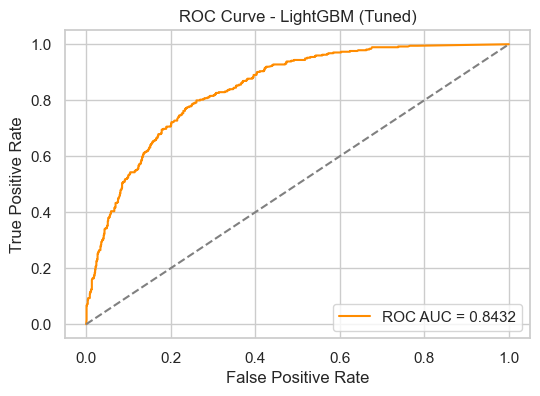

💾 Model kaydedildi: models/lightgbm_tuned.pkl


In [59]:
from models.train_model import train_and_evaluate_model

for model_name, model in best_models.items():
    train_and_evaluate_model(model, model_name, X_train, X_test, y_train, y_test, save_model=True)


In [60]:
path = f"models/{model_name.replace(' ', '_').replace('(', '').replace(')', '').lower()}.pkl"


In [61]:
path

'models/lightgbm_tuned.pkl'


🔍 Model: Soft Voting (Top 3)
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000430 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 905
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265353 -> initscore=-1.018328
[LightGBM] [Info] Start training from score -1.018328

📋 Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.68      0.51      0.58       374

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81    

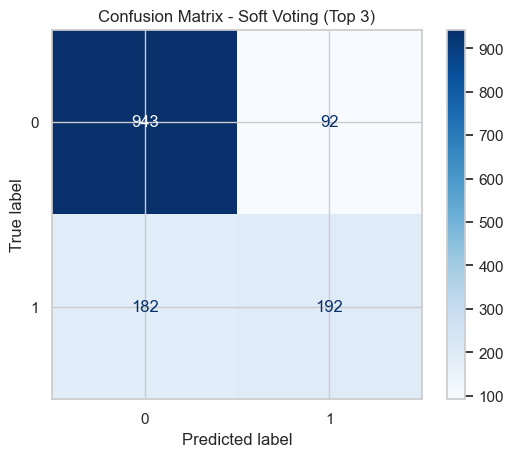

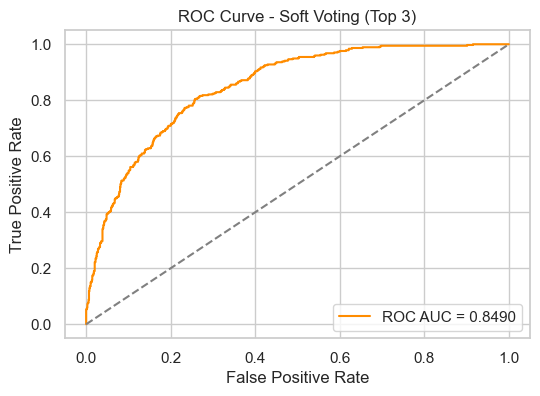

💾 Model kaydedildi: models/soft_voting_top_3.pkl


VotingClassifier(estimators=[('catboost',
                              <catboost.core.CatBoostClassifier object at 0x0000011A4B468620>),
                             ('logreg',
                              LogisticRegression(C=10, max_iter=1000,
                                                 random_state=42)),
                             ('lightgbm',
                              LGBMClassifier(learning_rate=0.01,
                                             n_estimators=200,
                                             random_state=42))],
                 voting='soft')

In [64]:
from models.train_model import build_soft_voting_classifier

# Soft voting modeli oluştur
voting_model = build_soft_voting_classifier(best_models)

# Test seti üzerinde değerlendirme
train_and_evaluate_model(
    model=voting_model,
    model_name="Soft Voting (Top 3)",
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    save_model=True
)
